# Introduction to machine learning with scikit-learn

By: Ana Matran-Fernandez

Based on the [scikit-learn documentation](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)

## Loading the 'breast cancer' dataset

Scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the Boston house prices dataset for regression.

In [1]:
import numpy as np
import sklearn
print(sklearn.__version__)

0.21.1


In [2]:
from sklearn import datasets

In [3]:
cancer = datasets.load_breast_cancer()

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the `.data` member, which is a `n_samples` by `n_features` array. In the case of supervised problem, one or more response variables are stored in the `.target` member.



In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
n_features = len(cancer.feature_names)
print("There are %d features in this dataset" % n_features)
print("The features are:", cancer.feature_names)

There are 30 features in this dataset
The features are: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


For instance, in the case of the breast cancer dataset, cancer.data gives access to the features that can be used to classify the samples:

In [6]:
print(cancer.data.shape)  # remember this is shape=(n_samples, n_features)
print(cancer.data)  # these are the features for each sample

(569, 30)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


and `cancer.target` gives the ground truth for the dataset, that is whether the tumor is benign or not:

In [7]:
print(cancer.target.shape)
print(cancer.target)
print(cancer.target_names)

(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0

This means that `target == 0` corresponds to `malignant`, and `target == 1` corresponds to `benign`

# Visualising the data

This is your chance to have a look at the data. We'll import some plotting libraries first.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(336.9714285714286, 0.5, 'mean texture')

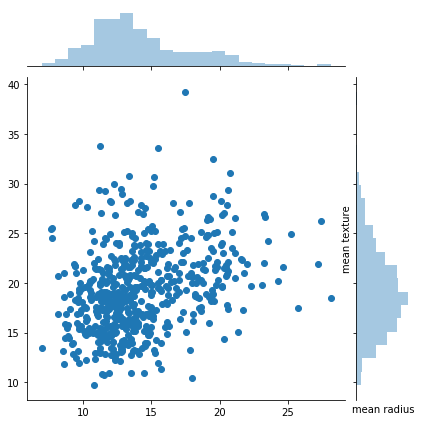

In [9]:
# we can use the jointplot function from seaborn to see if the correlation between a pair of features
sns.jointplot(cancer.data[:, 0], cancer.data[:, 1])  
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])


When working with linear models, it is very important to ensure that all the features are in the same range. Insert your code below to check the distributions of the different features, and try to decide whether this dataset needs to be standardised.

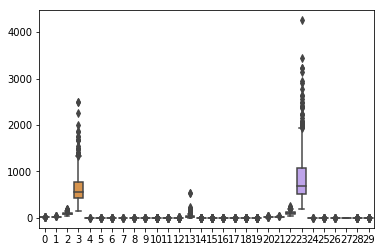

In [73]:
# Insert your own code here. HINT: Check the function "boxplot" in seaborn
sns.boxplot(data=cancer.data)

Although most features remain in the same range, features 3 and 23 are clearly different. Thus, we should standardise the dataset.

## Learning and predicting
In the case of the breast cancer dataset, the task is to predict, given some features, whether the tumor is benign or malign. We are given samples of each case, and with these samples we fit an estimator to be able to predict the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that implements the methods `fit(X, y)` and `predict(T)`.

An example of an estimator is the class `sklearn.svm.SVC` that implements support vector classification. The constructor of an estimator takes as arguments the parameters of the model, but for the time being, we will consider the estimator as a black box:

In [20]:
from sklearn import svm

In [21]:
clf = svm.SVC(gamma=0.0001, C=100.)

We call our estimator instance `clf`, as it is a classifier. **It now must be fitted to the model, that is, it must learn from the data**. This is done by passing our training set to the `fit` method. As a training set, let us use all the examples of our dataset except for the last one. 

We select this training set with the `[:-1]` Python syntax, which produces a new array that contains **all but the last entry** of `cancer.data`:

In [22]:
clf.fit(cancer.data[:-1], cancer.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Now you can predict new values, in particular, we can ask to the classifier whether the tumor from the last example is benign or not. **Remember that this patient was NOT used to train the classifier**:

In [28]:
y_new = clf.predict([cancer.data[-1]]) 
print(y_new)# Insert code here

[1]


We can also check what the real label for this patient was:

In [27]:
print(cancer.target[-1])

1


Can you print the actual raw values of the 30 features for this patient?

In [29]:
print(cancer.data[-1])

[7.760e+00 2.454e+01 4.792e+01 1.810e+02 5.263e-02 4.362e-02 0.000e+00
 0.000e+00 1.587e-01 5.884e-02 3.857e-01 1.428e+00 2.548e+00 1.915e+01
 7.189e-03 4.660e-03 0.000e+00 0.000e+00 2.676e-02 2.783e-03 9.456e+00
 3.037e+01 5.916e+01 2.686e+02 8.996e-02 6.444e-02 0.000e+00 0.000e+00
 2.871e-01 7.039e-02]


In [30]:
# This is an auxiliary function that we'll use to plot the results of our classification.

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



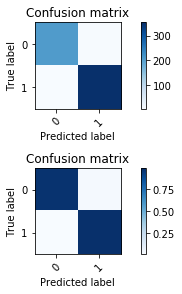

In [31]:
# Compute confusion matrix
y_pred = clf.predict(cancer.data)
cnf_matrix = confusion_matrix(cancer.target, y_pred)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plt.subplot(2,1,1)
plot_confusion_matrix(cnf_matrix, classes=range(len(set(cancer.target))), normalize=False,
                      title='Confusion matrix')
plt.subplot(2,1,2)
plot_confusion_matrix(cnf_matrix, classes=range(len(set(cancer.target))), normalize=True,
                      title='Confusion matrix')

#plt.savefig("confusion.png",bbox_inches='tight')
#plt.savefig("confusion.pdf",bbox_inches='tight')

An important aspect that we have not mentioned yet is that of unbalanced datasets. Is this dataset unbalanced?

What differences do you observe between using or not using normalisation when plotting the confusion matrix?

What are the most common types of errors?

In [37]:
# Insert code here: what percentage of samples are of class 1? And 0?

p0 = (cnf_matrix[0][0]+cnf_matrix[0][1])/(cnf_matrix[0][0]+cnf_matrix[0][1]+cnf_matrix[1][0]+cnf_matrix[1][1])
p1 = (cnf_matrix[1][0]+cnf_matrix[1][1])/(cnf_matrix[0][0]+cnf_matrix[0][1]+cnf_matrix[1][0]+cnf_matrix[1][1])

print("Percentage of benign class: %.2f%%" % (p1*100))
print("Percentage of malign class: %.2f%%" % (p0*100))

Percentage of benign class: 62.74%
Percentage of malign class: 37.26%


## Decision Trees

We can now try to use a different classifier. For example, we will now try a Decision tree.

In [56]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [57]:
clf = tree.DecisionTreeClassifier(criterion = "entropy")

# Now fit the tree using all samples of the cancer dataset except for the last one
clf.fit(cancer.data[:-1], cancer.target[:-1]) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Now check the new confusion matrix.

In [62]:
# Insert code here
y_pred = clf.predict([cancer.data[-1]])
cm = confusion_matrix([cancer.target[-1]],y_pred)

What's the accuracy of the classifier?

Now you can use some time to explore different classification metrics and see what information they give you. Have a look at the sklearn documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [65]:
# Insert code here
acc = accuracy_score([cancer.target[-1]],y_pred)
print(acc)

1.0


We can look at what are the most important features from our dataset according to the decision tree classifier

[20 27  1  6 24 22 13 12 21 15 19 14 25  4  5  3  9  2  7  8 29 10 11 28
 16 17 18 23 26  0] [0.   0.07 0.   0.   0.   0.   0.06 0.   0.   0.   0.   0.   0.02 0.02
 0.01 0.01 0.   0.   0.   0.01 0.59 0.01 0.02 0.   0.02 0.01 0.   0.17
 0.   0.  ]
Feature ranking:
1. worst radius (0.589616)
2. worst concave points (0.169118)
3. mean texture (0.067715)
4. mean concavity (0.055260)
5. worst smoothness (0.019036)
6. worst perimeter (0.018619)
7. area error (0.017415)
8. perimeter error (0.016312)
9. worst texture (0.010773)
10. compactness error (0.010212)
11. fractal dimension error (0.008962)
12. smoothness error (0.008930)
13. worst compactness (0.008032)
14. mean smoothness (0.000000)
15. mean compactness (0.000000)
16. mean area (0.000000)
17. mean fractal dimension (0.000000)
18. mean perimeter (0.000000)
19. mean concave points (0.000000)
20. mean symmetry (0.000000)
21. worst fractal dimension (0.000000)
22. radius error (0.000000)
23. texture error (0.000000)
24. worst symmetry (0

(0, 0.619096424490104)

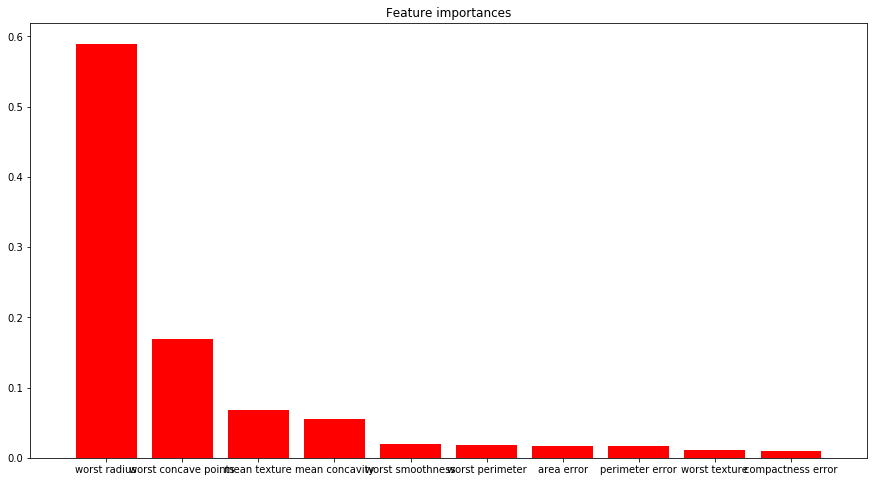

In [71]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print(indices,importances)

# Print the feature ranking
print("Feature ranking:")
#####CHECK THIS (HOW TO PRINT ADDING ONE TO EACH LINE)
for f in range(n_features):
    print("%d. %s (%f)" % (f + 1, cancer.feature_names[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
num_feat_to_plot = 10  # just the top 10 features
plt.bar(range(num_feat_to_plot), importances[indices[:num_feat_to_plot]], color="r", align="center")
plt.xticks(range(num_feat_to_plot), np.array(cancer.feature_names)[indices[:num_feat_to_plot]])
plt.xlim([-1, num_feat_to_plot])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

#plt.savefig("importances.png",bbox_inches='tight')
#plt.savefig("importances.pdf",bbox_inches='tight')

Now plot the distributions of values of the top 5 features. Are there any relationships between them? You can use functions from seaborn such as distplot or jointplot to look at this.

# Standardisation

Did you figure out whether your data should be standardised? If so, play with different methods from the sklearn library.
You can get some ideas here: https://scikit-learn.org/stable/modules/preprocessing.html

Make sure your data still looks OK before attempting to re-train a classifier (i.e., plot it!).

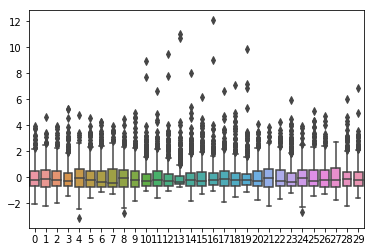

In [77]:
from sklearn.preprocessing import scale
sns.boxplot(data=scale(cancer.data))

After you've standardised your data, try to fit a decision tree classifier again. Is the performance affected by this processing?

In [82]:
clf = tree.DecisionTreeClassifier(criterion = "entropy")
# Now fit the tree using all samples of the cancer dataset except for the last one
std = scale(cancer.data)
clf.fit(std[:-1], cancer.target[:-1]) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [86]:
y_pred = clf.predict([std[-1]])

In [87]:
cm = confusion_matrix([cancer.target[-1]],y_pred)
acc = accuracy_score([cancer.target[-1]],y_pred)
print(acc)

1.0
